## Zillow Exploration

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r"//Users/nicapotato//Desktop//Data//Zillow")
properties = pd.read_csv("properties_2016.csv")
transactions = pd.read_csv("train_2016_v2.csv",parse_dates=["transactiondate"])

/Users/nicapotato/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
transactions.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 87594 to 31487
Data columns (total 3 columns):
parcelid           1000 non-null int64
logerror           1000 non-null float64
transactiondate    1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 31.2 KB


In [5]:
transactions= transactions.sample(n=1000)

## Visualization

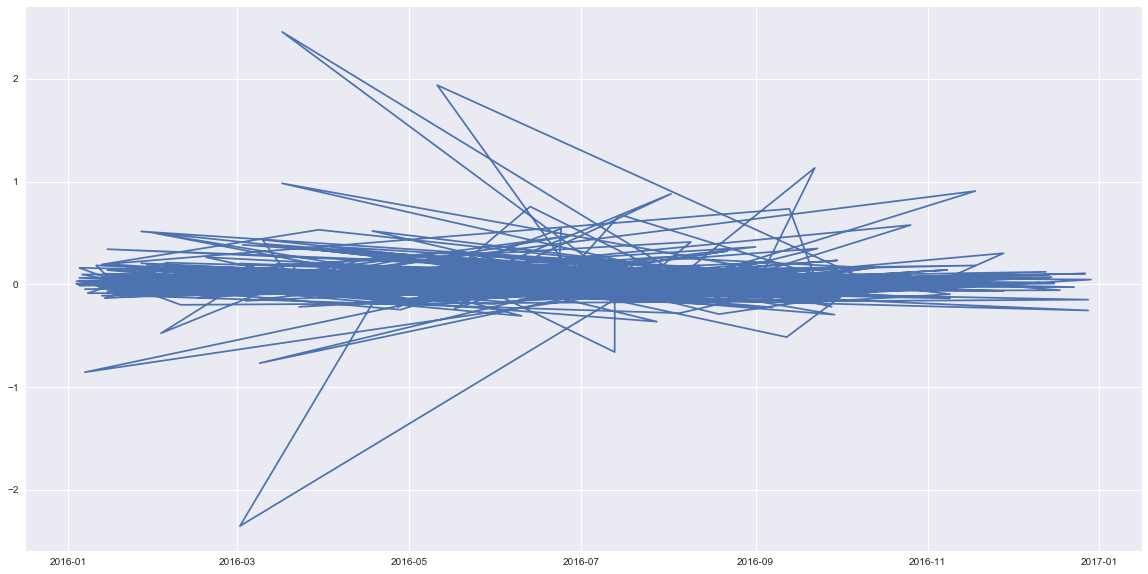

In [8]:
# Plot Error (Y) and TransactionDate
plt.figure(figsize=(20,10))
plt.plot(transactions.transactiondate, transactions.logerror);
# Perhaps I can use a heatmap, or change

In [9]:
# Transform
transactions['transaction_month'] = transactions['transactiondate'].dt.month
transactions['transaction_year'] = transactions['transactiondate'].dt.year
df = transactions.loc[:,['transaction_year', 'transaction_month', 'logerror']]
del transactions

In [10]:
df.head()

,transaction_year,transaction_month,logerror
87594,2016,11,-0.0212
40121,2016,5,0.0020
44227,2016,6,0.0334
68426,2016,8,0.3243
36384,2016,5,-0.0587


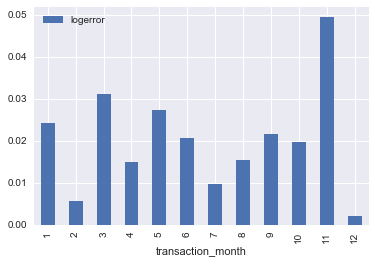

In [11]:
# Get average error by month
df[['logerror','transaction_month']]\
.groupby(['transaction_month'])[['logerror']].mean().plot.bar()

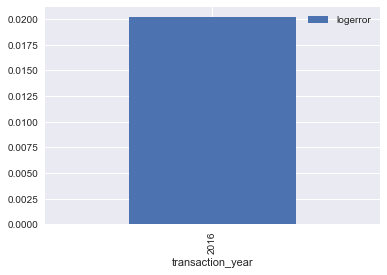

In [13]:
# Get average error by month
df[['logerror','transaction_year']]\
.groupby(['transaction_year'])[['logerror']].mean().plot.bar()

ValueError: Unknown format code 'd' for object of type 'float'

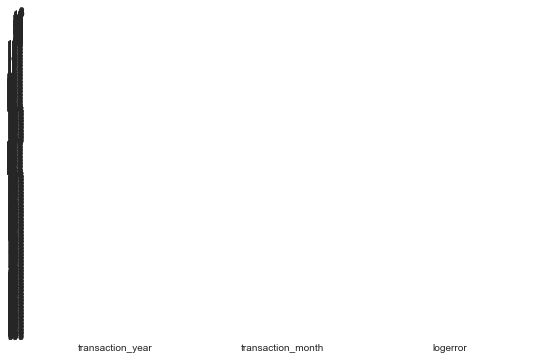

In [15]:
sns.set()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df, annot=True, fmt="d", linewidths=.5, ax=ax)

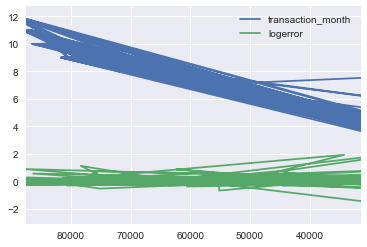

In [18]:
# Line Plot of average by month?
df.loc[:,["transaction_month",'logerror']].plot()

In [ ]:
# Before I can start plotting this, I must aggregate the values by time in some fashion
# or else the plots are overwhelmed. Best method is probably mean

# Distribution of logerror
# Distribution of transactions by time
# Distribution of pos/neg error count by time

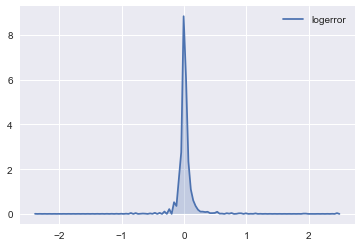

In [14]:
sns.kdeplot(df["logerror"], shade=True)

In [23]:
transactions["error"] = transactions["logerror" >= 0, "positive"]

TypeError: '>=' not supported between instances of 'str' and 'int'